<CENTER>
<img src="https://secure.meetupstatic.com/photos/theme_head/d/9/1/7/full_7435575.jpeg" width="100%">

  <header>
    <h1>Python Data Science</h1>
    <h3>18 Octubre 2017</h3>
    <h2>@victormartin</h2>
    <p></p>
  </header>
</CENTER>

In [87]:
%matplotlib inline

import pandas as pd
import numpy as np

import os
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (16, 6)

import seaborn as sns

sns.set_context("notebook", font_scale=1.4)
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings('ignore')


# Contingut d'aquesta xerrada

- Data Science i Machine Learning
- Per què Python?
- Kaggle.com - Plataforma de competicions de data science
- Titanic - Getting Started competition


Per veure aquest notebook en format de presentació (Reveal.js):

```
$jupyter nbconvert datascience_introduction.ipynb --to slides --post serve
```

# Què vol dir *data science*?

> *Anàlisis de dades aplicant mètodes científics per tal d'extraure coneixement*
>
> [Definició de Wikipedia](https://en.wikipedia.org/wiki/Data_science])


Del reconeixement de patrons ha evolucionat cap al *machine learning* -> algorismes d'aprenentatge

# Què vol dir *machine learning*?

> *Camp d'estudi que dona a les computadores la habilitat d'aprendre sense haber estat explícitament programades*
>
> Arthur Samuel - 1959

# Diferents tipus de algoritmes de aprenentatge

- **[Supervised learning](https://en.wikipedia.org/wiki/Supervised_learning)**
- [Unsupervised learning](https://en.wikipedia.org/wiki/Unsupervised_learning)
- [Reinforcement learning](https://en.wikipedia.org/wiki/Reinforcement_learning)
- [Recommender systems](https://en.wikipedia.org/wiki/Recommender_system)
- (...)

## <font color="FireBrick ">Mega-links:</font>

- Curs [Introduction to Machine Learning](https://www.coursera.org/learn/machine-learning) de Andrew Ng a Coursera - Aquí **[un bon resum/apunts](http://www.holehouse.org/mlclass/)** pels més mandrosos ;)


# Aprenentatge supervisat

- Proveïr a un algorisme d'aprenentatge (**learning algorithm**) dades d'entrenament de les quals pugui aprendre.

- El **training data** està format per una sèrie d'atributs (**features**), i una columna amb la resposta correcte, la qual anomenem **target** (o **label**)

- Durant la fase de **training** el *learning algorithm* troba patrons sobre el *training data* que "mapejen" els *features* al *target* (resposta que volem predir). Retorna un **model** que captura aquests patrons.

- Per últim podem fer servir aquest *model* per fer prediccions amb dades que no sabem el *target*.

### Exemple de ML: Predicció de preu de venda de pisos

In [88]:
# TRAINING SET
dades = {
    u'Superfície (m2)': [50,70,100,130,200],
    u'Terrassa (m2)': [0,0,4,8,40],
    u'Num banys': [1,1,2,2,4],
    u'Plaçes Parking': [0,0,1,0,2],
    u'Barri': ["Font de la Pólvora","Taialà","Eixample","Barri Vell","Palau"],
    u'Preu (€)': [50000,75000,190000,280000,350000],
}
pd.DataFrame(dades).reindex(columns=[u"Barri", u"Superfície (m2)",u"Num banys",
                                     u"Terrassa (m2)",u"Plaçes Parking",u"Preu (€)"])

,Barri,Superfície (m2),Num banys,Terrassa (m2),Plaçes Parking,Preu (€)
0,Font de la Pólvora,50,1,0,0,50000
1,Taialà,70,1,0,0,75000
2,Eixample,100,2,4,1,190000
3,Barri Vell,130,2,8,0,280000
4,Palau,200,4,40,2,350000


** <small>Bon moment per recuperar els slides <a href="https://github.com/victormartingarcia/2017-pyGrn-intropandas" target="_blank">"Intro to Pandas"</a> :)</small>

In [89]:
# PREDICCIONS
dades = {
    u'Superfície (m2)': [90,120],
    u'Terrassa (m2)': [0,6],
    u'Num banys': [1,2],
    u'Plaçes Parking': [0,1],
    u'Barri': ["Taialà","Palau"],
    u'Preu (€)': ["???","???"],
}
pd.DataFrame(dades).reindex(columns=[u"Barri", u"Superfície (m2)",u"Num banys",
                                     u"Terrassa (m2)",u"Plaçes Parking",u"Preu (€)"])

,Barri,Superfície (m2),Num banys,Terrassa (m2),Plaçes Parking,Preu (€)
0,Taialà,90,1,0,0,???
1,Palau,120,2,6,1,???


## Exemple visual ML

In [90]:
dades = {
    u'Superfície (m2)': [50,70,100,130,200],
    u'Preu (€)': [50000,55000,190000,220000,300000],
}
df_training = pd.DataFrame(dades)
df_training.reindex(columns= [u"Superfície (m2)",u"Preu (€)"])

,Superfície (m2),Preu (€)
0,50,50000
1,70,55000
2,100,190000
3,130,220000
4,200,300000


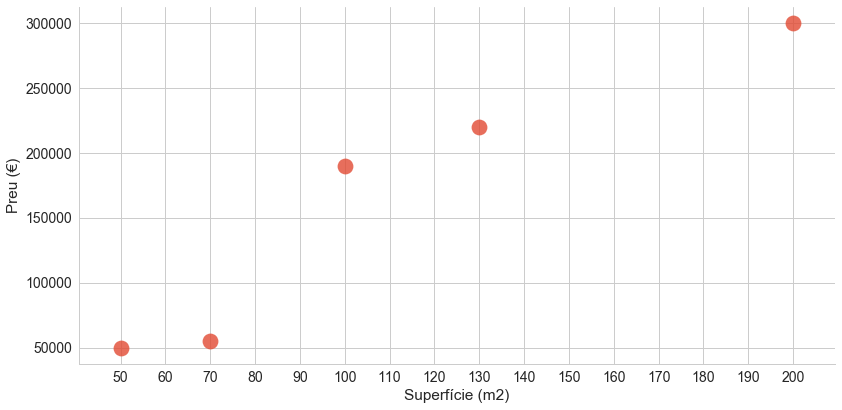

In [91]:
# Dibuixem les dades d'entrenament
sns.lmplot(x=u'Superfície (m2)', y=u'Preu (€)',
           data=df_training, # Data source
           fit_reg=False, # Don't fix a regression line
           size=6, aspect=2,
           scatter_kws={"s": 250} ).set(xticks=np.arange(50,201,10));

**Quant puc demanar per un pis de 90m2?**

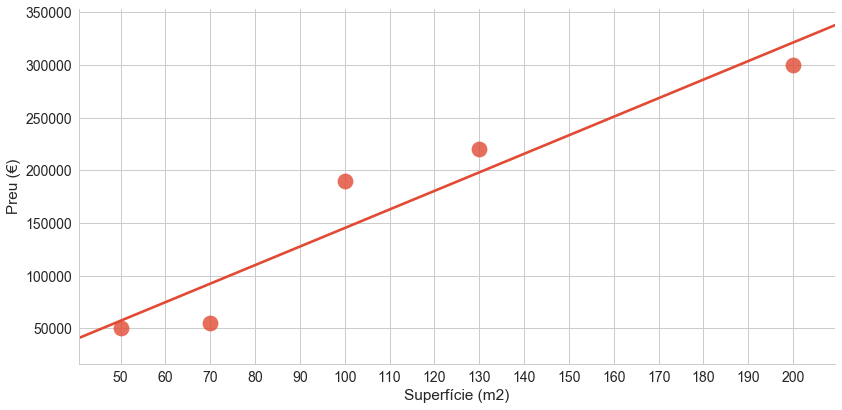

In [92]:
# Dibuixem les dades d'entrenament -> REGRESSIÓ LINEAL
sns.lmplot(x=u'Superfície (m2)', y=u'Preu (€)',
           data=df_training, # Data source
           fit_reg=True, # Fix a regression line
           ci=0, size=6, aspect=2, scatter_kws={"s": 250}
).set(xticks=np.arange(50,201,10));

**Segons aquest model, per un pis de 90m2 puc demanar 130 000€**

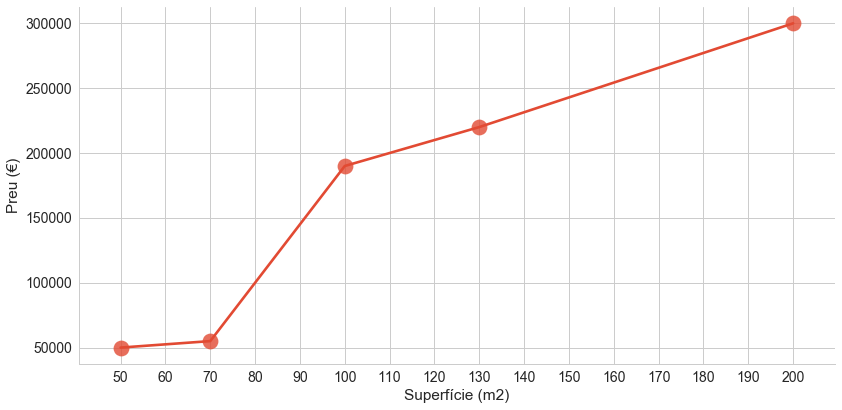

In [93]:
# Dibuixem les dades d'entrenament -> Un altre algorisme predictiu
sns.lmplot(x=u'Superfície (m2)', y=u'Preu (€)',
           data=df_training, # Data source
           lowess=True, # Fix a logistic line
           ci=0, size=6, aspect=2,
           scatter_kws={"s": 250}).set(xticks=np.arange(50,201,10));

**WTF!!** Segons aquest altre model, per un pis de 90m2 puc demanar 150 000€ ( 20k € més!). Quin és el bò?

# Objectiu: Crear un model que *generalitzi*

Per *generalització* entenem que el model s'ajusti a TOTES les dades Out-sample, no només a les dades in-sample del training set.

<center>
<img src="https://www.netquest.com/hubfs/Imported_Blog_Media/data.png" width="60%"/>
<p align="center">Funció sin(2πx)</p>
</center>

# Underfitting i Overfitting
<center>
<img src="https://www.netquest.com/hubfs/Imported_Blog_Media/4modelos1.png" width="100%"/>
<p align="center">M = Ordre del polinomi</p>
</center>

# "La prueba del algodón": Cross-Validation

Per saber si un model generalitza, s'ha de probar amb dades noves (out-of-sample). 

**Tècnica *Cross-Validation* **: 

1. Separar el dataset en 2 conjunts (p.ex. 70%/30% de les dades)
1. Entrenarem el nostre model amb el primer conjunt (**training set**)
1. Aplicarem el model al segon conjunt (**validation set**)
1. Mesurarem el *performance* del nostre model amb qualsevol [métrica d'evaluació](http://scikit-learn.org/stable/modules/model_evaluation.html)

<center>
<img src="https://www.netquest.com/hubfs/Imported_Blog_Media/errorvsm.png" width="70%"/>
</center>

# Algoritmes d'aprenentatge

<center>
<img src="https://udarajay.com/content/images/2017/10/machinelearningalgorithms.png" width="100%"/>
</center>

# Random Forest

> When in doubt, use [Random Forest](https://en.wikipedia.org/wiki/Random_forest) — the go-to machine learning algorithm that is considered to be one of the most effective and versatile in solving almost any prediction task
>
> Rebecca Merrett, TechWorld Australia

## <font color="FireBrick ">Mega-links sobre introducció als algorismes de ML:</font>

- [Visualització/Exemple de arbres de decisió](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
- [Essentials of Machine Learning algorithms](https://www.analyticsvidhya.com/blog/2017/09/common-machine-learning-algorithms/)

# Worflow per abordar un problema de machine learning

<center>
<img src="https://udarajay.com/content/images/2017/10/17-038-ml-concept_0.jpg" width="90%"/>
</center>

## <font color="FireBrick ">Mega-links sobre aplicació pràctica de ML:</font>


- [Advice for applying Machine Learning](http://www.holehouse.org/mlclass/10_Advice_for_applying_machine_learning.html): Apunts del curs Introduction de Machine Learning de Coursera
- [Machine Learning Systems Design](http://www.holehouse.org/mlclass/11_Machine_Learning_System_Design.html): Apunts del curs Introduction de Machine Learning de Coursera
- [Best Practices for ML Engineering](http://martin.zinkevich.org/rules_of_ml/rules_of_ml.pdf): Escrit per un enginyer de Google (PDF)



# Per què Python?

* Históricament s'ha utilitzat llenguatges i eines com R, Matlab/Octave, Mathematica ...

La comunitat Python ha sapigut agafar el bò i millor d'aquestes eines:

* Anàlisis numèric Matlab -> **numpy**
* R dataframes -> **pandas**
* Matlab plotting -> **matplotlib**
* Mathematica notebooks -> **jupyter notebooks**
* R caret -> **scikit-learn**
* (...)

# [Kaggle.com](www.kaggle.com)

Competicions de datascience amb regles senzilles:

- Cada competició té 2 datasets públics: **training** (labeled) i **test**


- Els participants han de pujar un fitxer .CSV amb els camps ID (del test) i TARGET (la seva predicció). Aquest upload se'n diu **submission**

- Sobre un percentatge d'aquestes prediccions, s'evaluen l'accuracy mitjançant la [mètrica de la competició](https://www.kaggle.com/wiki/Metrics), i el submission apareix en el **public leaderboard**

- Quan acaba el termini de la competició, s'evaluen tots els submissions amb la resta de dades del **test set**, i es crea un **private leaderboard** que determina els guanyadors finals.

# Kaggle Tips and Tricks

- Fòrum de les competicions
- [Blog de Kaggle](http://blog.kaggle.com/) amb entrevistes a guanyadors de competicions concloses
- **Ensembles** -> Teaming

# Competició Getting Started: Titanic

- El 15 d'Abril de 1912 es va enfonsar el Titanic debut a la col.lisió amb un iceberg.
- Van morir 1502 de les 2224 persones que viatjaven a bord (entre passatgers i tripulació)
- Una de les raons es que no hi havia els suficients bots salvavides
- Tot i el component de sort, hi van haver grups amb més possibilitats de sobreviure que d'altres (dones, nens, passatgers de primera classe...)




** Problema de classificació binària:** Per cada passatger, hem de determinar si es va salvar o no

<center>
<br />
<img src="http://www.pearlanddean.com/sites/default/files/titanic_0.gif"/>
</center>


In [94]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = 16, 12
import matplotlib
matplotlib.style.use('ggplot')

from sklearn.model_selection import cross_val_score

# 1/5 - Carregar les dades

Info pública sobre el dataset: https://www.kaggle.com/c/titanic/data

In [95]:
# Descripció de les dades
from IPython.display import IFrame
IFrame('http://rstudio-pubs-static.s3.amazonaws.com/24969_894d890964fd4308ab537bfde1f784d2.html', width=700, height=350)

In [96]:
# Training set
df_train = pd.read_csv('data/train.csv')

In [97]:
# 3 passatgers a l'atzar
df_train.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
120,121,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.50,NaN,S
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.55,C22 C26,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S


# 2/5 - Preparar les dades

In [98]:
# eliminar columnes innecesàries
df_train = df_train.drop(["PassengerId", "Cabin", "Ticket","Embarked","Name","Sex"], axis=1)

# emplenar NaN
df_train = df_train.fillna(df_train.mean())

In [99]:
df_train.sample(3)

,Survived,Pclass,Age,SibSp,Parch,Fare
120,0,2,21.000000,2,0,73.5000
495,0,3,29.699118,0,0,14.4583
457,1,1,29.699118,1,0,51.8625


# 3/5 - Feature engineering

Ho guardem per més tard ;)

# 4/5 Creació i validació del model 

In [100]:
# Benchmark Linear Regression
from sklearn.linear_model import LinearRegression

clf_LR = LinearRegression()
scores_LR = cross_val_score(clf_LR, df_train.drop("Survived", axis=1), df_train["Survived"], cv=4)

print("Linear Regression Accuracy: %0.5f (+/- %0.5f)" % (scores_LR.mean(), scores_LR.std() * 2))

Linear Regression Accuracy: 0.14476 (+/- 0.16068)


In [101]:
# Benchmark Random Forest
from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier(n_estimators=100)
scores_RF = cross_val_score(clf_RF, df_train.drop("Survived", axis=1), df_train["Survived"], cv=4)

print("Random Forest Accuracy: %0.5f (+/- %0.5f)" % (scores_RF.mean(), scores_RF.std() * 2))

Random Forest Accuracy: 0.67679 (+/- 0.02773)


In [102]:
# Entrenem el model amb totes les dades:
clf_RF.fit(df_train.drop("Survived", axis=1), df_train["Survived"]);

# 5/5 Submission

In [103]:
# LLegim el test dataset de disc
df_test = pd.read_csv('data/test.csv')

# eliminar columnes innecesàries
df_test = df_test.drop(["PassengerId", "Cabin", "Ticket","Embarked","Name","Sex"], axis=1)

# emplenar NaN
df_test = df_test.fillna(df_test.mean())

In [104]:
# Apliquem el model Random Forest que hem entrenat prèviament
output = clf_RF.predict(df_test)

df_output = pd.DataFrame()
df_output['PassengerId'] = pd.read_csv('data/test.csv')['PassengerId']
df_output['Survived'] = output

## Aquest serà el fitxer CSV del submission:
#df_output[['PassengerId','Survived']].to_csv('data/submission.csv',index=False)

df_output[['PassengerId','Survived']].sample(3)

,PassengerId,Survived
184,1076,1
90,982,0
149,1041,1


# Feature Engineering: La mare dels ous

> Procés de transformar les dades "crues" (*raw data*) en atributs distintius (*features*) fent servir coneixement del domini (experiència), per tal de representar millor el problema de fons i amb l'objectiu de millorar l'*accuracy* de les prediccions en dades noves (*out of sample*)

**Exemple**: *"Les dones i els nens primer"*

In [105]:
df_train = pd.read_csv('data/train.csv')

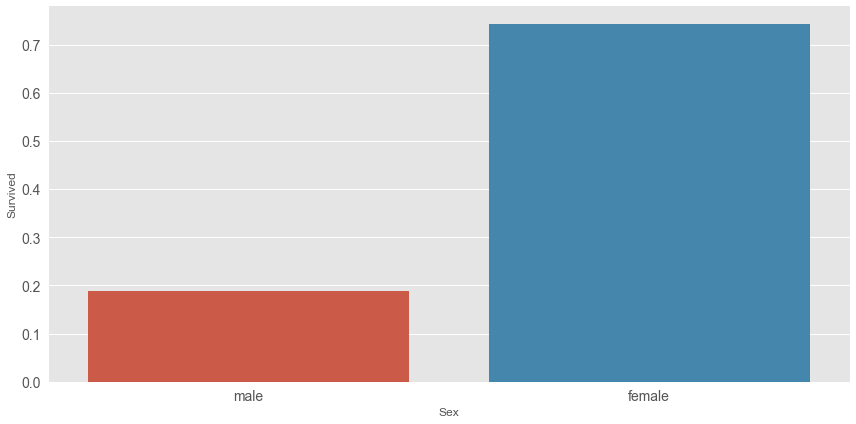

In [106]:
# Percentatge homes/dones que es van salvar:
sns.factorplot('Sex', 'Survived', data = df_train, ci=None, kind = 'bar', size=6, aspect=2);

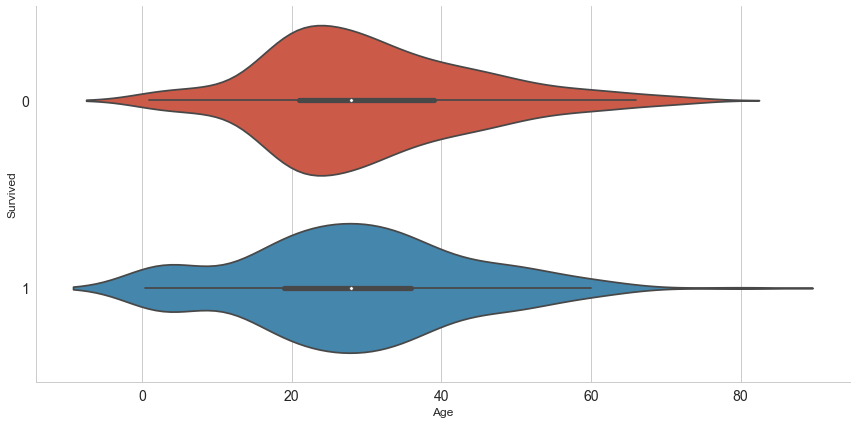

In [107]:
# Persones salvades segons edat
sns.set_style("whitegrid")
sns.factorplot('Age',  'Survived',  data = df_train, hue_order = [1,0], orient="h", kind="violin", size=6, aspect=2);

In [108]:
# eliminar columnes innecesàries
df_train = df_train.drop(["PassengerId", "Cabin", "Ticket","Embarked","Name"], axis=1)

# emplenar NaN
df_train = df_train.fillna(df_train.mean())

In [109]:
# Creem un nou feature anomenat "AgeCategory"
df_train["AgeCategory"] = "Adult"

df_train.loc[df_train["Age"]<16, "AgeCategory"]="Child"
df_train.loc[df_train["Age"]>=60, "AgeCategory"]="Old"

In [110]:
df_train.sample(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,AgeCategory
774,1,2,female,54.000000,1,3,23.0000,Adult
750,1,2,female,4.000000,1,1,23.0000,Child
5,0,3,male,29.699118,0,0,8.4583,Adult


In [111]:
# Transformem les features categòriques (Sex i AgeCategory) en booleanes!
df_train = pd.get_dummies(df_train, columns=["Sex", "AgeCategory"]).drop(["Age"], axis=1)

In [112]:
df_train.sample(3)

,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,AgeCategory_Adult,AgeCategory_Child,AgeCategory_Old
8,1,3,0,2,11.1333,1,0,1,0,0
245,0,1,2,0,90.0000,0,1,1,0,0
30,0,1,0,0,27.7208,0,1,1,0,0


## Com millora l'algorisme ML amb aquestes noves columnes?

In [113]:
clf_RF = RandomForestClassifier(n_estimators=100)
scores_RF = cross_val_score(clf_RF, df_train.drop("Survived", axis=1), df_train["Survived"], cv=4)

print ("[Abans] Random Forest Accuracy: 0.68244 (+/- 0.04123)")
print ("[ ARA ] Random Forest Accuracy: %0.5f (+/- %0.5f)" % (scores_RF.mean(), scores_RF.std() * 2))

[Abans] Random Forest Accuracy: 0.68244 (+/- 0.04123)
[ ARA ] Random Forest Accuracy: 0.81038 (+/- 0.04829)


# Som capaços de millorar aquest 81% de accuracy entre tots?



In [114]:
from IPython.display import IFrame
IFrame('http://rstudio-pubs-static.s3.amazonaws.com/24969_894d890964fd4308ab537bfde1f784d2.html', width=700, height=350)

In [115]:
pd.read_csv('data/train.csv').sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
546,547,1,2,"Beane, Mrs. Edward (Ethel Clarke)",female,19.0,1,0,2908,26.0000,NaN,S
492,493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5000,C30,S
828,829,1,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.7500,NaN,Q
620,621,0,3,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C


In [116]:
# Idees Feature Engineering 1/3 : Categoritzar persones segons el títol de la columna Name (Mrs, Miss, Master, Officer, Royalty)

 dictTitles = {
     "Capt": "Officer",
     "Col": "Officer",
     "Major": "Officer",
     "Jonkheer": "Royalty",
     "Don": "Royalty",
     "Sir": "Royalty",
     "Dr": "Officer",
     "Rev": "Officer",
     "the Countess": "Royalty",
     "Mme": "Mrs",
     "Mlle": "Miss",
     "Ms": "Mrs",
     "Mr": "Mr",
     "Mrs": "Mrs",
     "Miss": "Miss",
     "Master": "Master",
     "Lady": "Royalty"
}

X['Embarked'] = X['Embarked'].fillna('S')
X['title'] = X['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
X['title'] = X['title'].map(dictTitles)
X = X.drop(['Name'], axis=1)

X = pd.get_dummies(X, columns=['Embarked', 'title'])

IndentationError: unexpected indent (<ipython-input-116-b852c4f64190>, line 3)

In [ ]:
# Idees Feature Engineering 2/3 : Crear feature amb el nombre de familiars que viatgen
X['family_size']= (X["SibSp"]+X["Parch"])+1

In [ ]:
# Idees Feature Engineering 3/3 : Contar el número de persones amb el mateix "Ticket"

pd.read_csv('data/train.csv').groupby("Ticket")["Survived"].count().sort_values()

In [ ]:
# CROSS-VALIDATION SAMPLE

df_train = pd.read_csv('data/train.csv')

# eliminar columnes innecesàries
df_train = df_train.drop(["PassengerId", "Cabin", "Ticket","Embarked","Name"], axis=1)

# emplenar NaN
df_train = df_train.fillna(df_train.mean())

# Creem un nou feature anomenat "AgeCategory"
df_train["AgeCategory"] = "Adult"

df_train.loc[df_train["Age"]<16, "AgeCategory"]="Child"
df_train.loc[df_train["Age"]>=60, "AgeCategory"]="Old"

# Transformem les features categòriques (Sex i AgeCategory) en booleanes!
df_train = pd.get_dummies(df_train, columns=["Sex", "AgeCategory"]).drop(["Age"], axis=1)

#########################################################
## PROBAR NOUS FEATURES AQUÍ!
#########################################################


#########################################################
#########################################################


clf_RF = RandomForestClassifier(n_estimators=100)
scores_RF = cross_val_score(clf_RF, df_train.drop("Survived", axis=1), df_train["Survived"], cv=4)

print ("Random Forest Accuracy: %0.5f (+/- %0.5f)" % (scores_RF.mean(), scores_RF.std() * 2))

## Gràcies per escoltar! Preguntes?


- https://github.com/victormartingarcia
- <a href="mailto:victor.martin.garcia@gmail.com">victor.martin.garcia@gmail.com</a>
- [@victormartin](https://twitter.com/victormartin)


Slides and data: Source: https://github.com/victormartingarcia/2017-pyGrn-introdatascience

Slides presented with 'live reveal' https://github.com/damianavila/RISE
